# Homework
1. Добавить к своему отчету одну Simple или Multiple Logistic Model.


2. Если в вашем датасете нет categorical variable, создать колонку самим. Например, посчитаете mean price для дома и машины и создадите две группы: "дорогие дома/машины" (значение 1, это надо прописать) и "дешевые дома/машины"(значение 0, это надо прописать). 

Для этого посмотрите, как сделать это в библиотеке pandas. Команда будет примерно такая:


Название_датасета['Ваше_название_колонки'] = np.where(df['Цена дома (Надо вставить название колонки, по которой будете фильтровать'] >=  значение_mean_price_вставить, '1', '0')

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

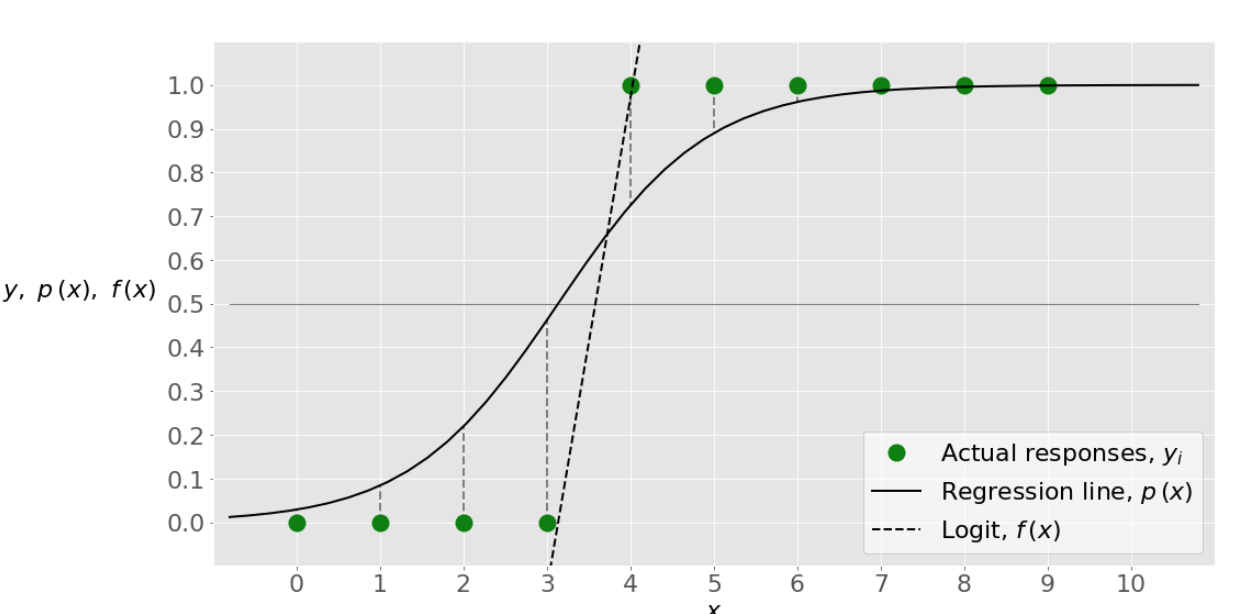

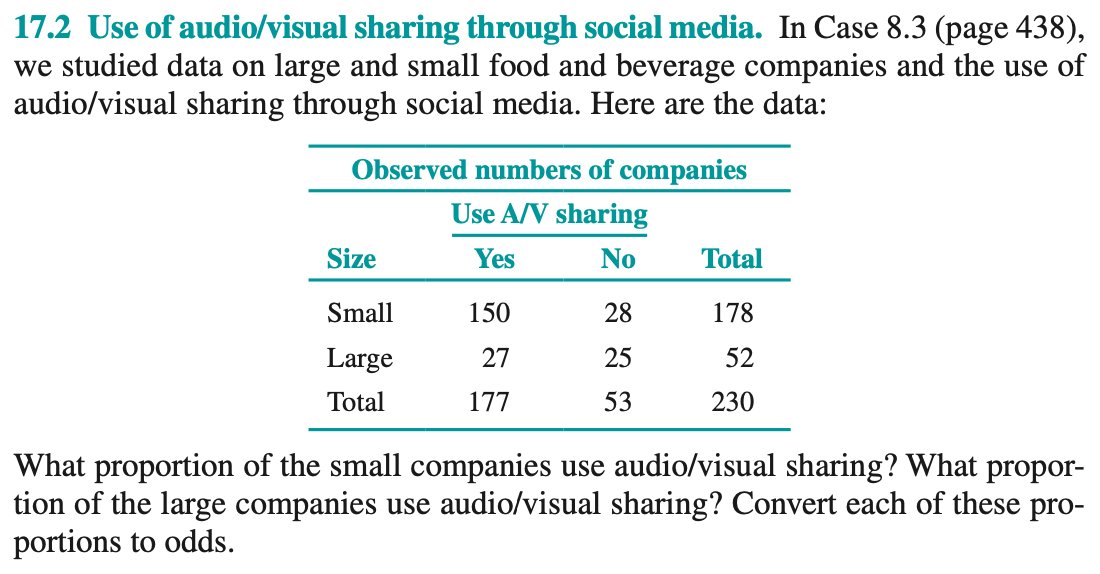

In [ ]:
#The proportion of the small companies use audio/visual sharing: 
p_small = 150/178
print('The proportion of the small companies use audio/visual sharing:', p_small)
print()

small_odds = (p_small/(1-p_small))
print('The estimated odds of the small companies use audio/visual sharing', small_odds)
print()
#The proportion of the large companies use audio/visual sharing:
p_large = 27/52
print('The proportion of the large companies use audio/visual sharing:', p_large)
print()
large_odds = (p_large/(1-p_large))
print()
print('The estimated odds of the large companies use audio/visual sharing', large_odds)
print()

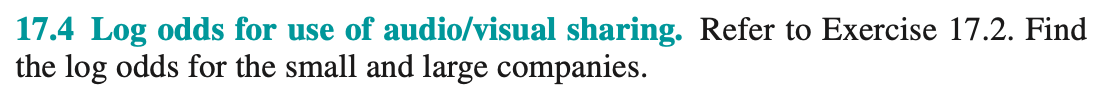

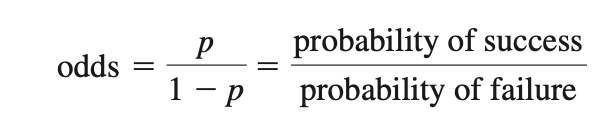

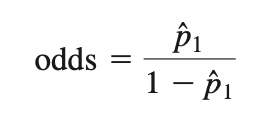

In [ ]:
log_odd_small = np.log(small_odds)
log_odd_small

In [ ]:
log_odd_large = np.log(large_odds)
log_odd_large

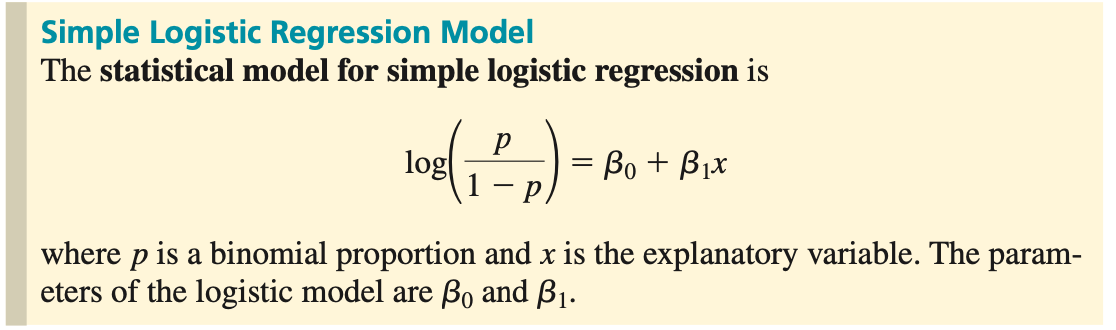

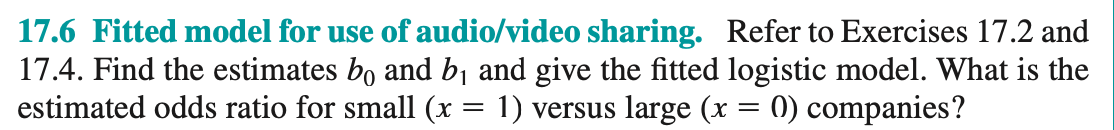

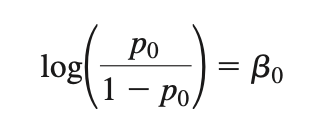

In [ ]:
b0 = np.log(large_odds)
b0

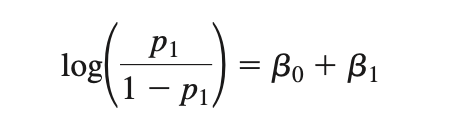

In [ ]:
b1 = log_odd_small - np.log(large_odds) 
b1

# Most people are not comfortable thinking in the logsoddsd scale, so interpretation of the results in terms of the regression slope is difficult.

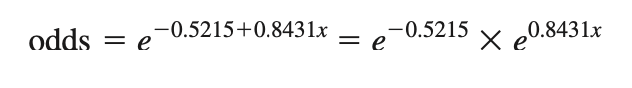

Instead 're' is 'small'

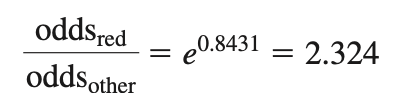

In [ ]:
result_task = (np.e)**b1
result_task

ODDS_small = ODDS_large * e^b1

# The odds are the ratio of the proportions for the two possible outcomes. The odds of small companies when a company use a audio/visual sahring are about 4.5 times larger the odds when a company is large.

# Q2: Logistic model, dataset 1

In [ ]:
dataset = ... 
dataset

Информация о датасете:

Характеристики колонок:

Присваиваем значения x и y:

In [ ]:
# input 
x = dataset.iloc[:, [3]].values 
  
# output 
y = dataset.iloc[:, 4].values

Стандартизируем, потому что range двух колонок Age и EstimatedSalary сильно отличается, эффект одного перекрывает эффект другого:

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
x = sc_x.fit_transform(x)  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression(fit_intercept=True, intercept_scaling=1)
model.fit(x, y)
predicted_classes = model.predict(x)

In [ ]:
slope = model.coef_
slope

In [ ]:
intercept = model.intercept_
intercept

# Вопрос, как надо интерпретировать коэффициенты? 

Другая библиотека:

In [ ]:
x = sm.add_constant(x)
model = sm.Logit(y, x)
result = model.fit()

In [ ]:
result.params

In [ ]:
result.summary()

In [ ]:
result.summary2()

# Logistic multiple model

Пример графика

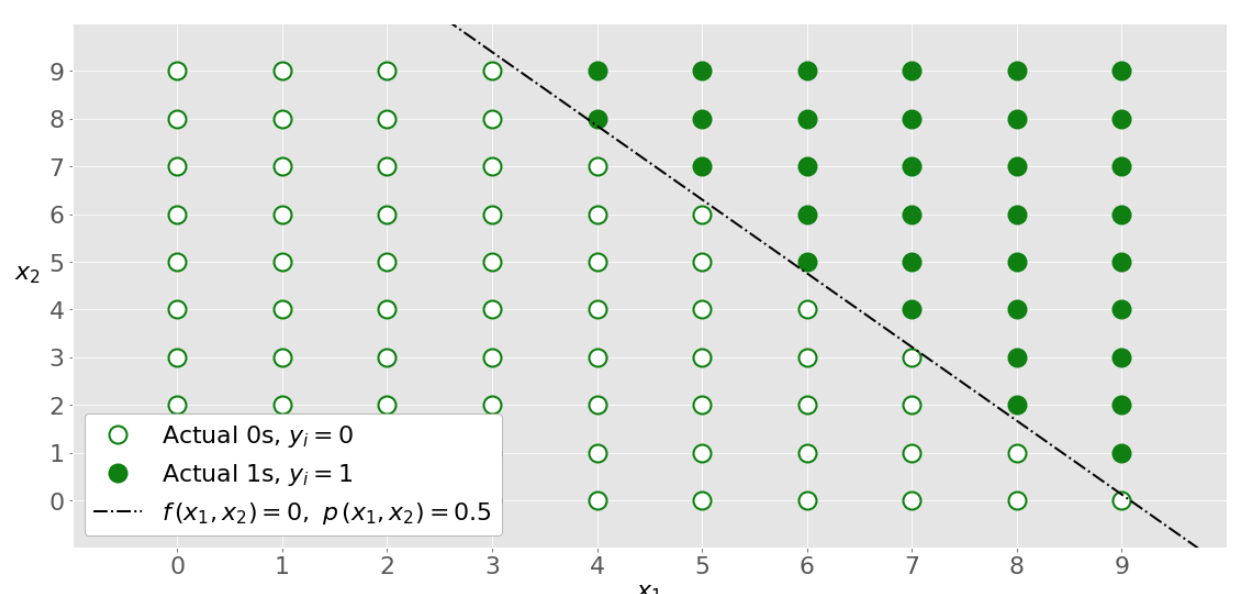

In [ ]:
# input 
x = dataset.iloc[:, [2, 3]].values 
  
# output 
y = dataset.iloc[:, 4].values

In [ ]:
sc_x = StandardScaler() 
x = sc_x.fit_transform(x) 
model = LogisticRegression(fit_intercept=True, intercept_scaling=1)
model.fit(x, y)
predicted_classes = model.predict(x)

In [ ]:
parameters = model.coef_
parameters

In [ ]:
intercept = model.intercept_
intercept

# Data explanatory analysis 

## Открываем датасет

## Print the first 5 rows of the train dataset:

## Print the size of dataset (how manyrows, how many columns):

## Print the data types of the data in columns:

In [ ]:
datadict = pd.DataFrame(titanic_dataset.dtypes)
datadict

## Identify missing values of the 11 columns, add the stats to the datadict


In [ ]:
datadict['MissingVal'] = titanic_dataset.isnull().sum()
datadict

## Identify number of unique values, For object nunique will the number of levels. Add the stats the data dict:

In [ ]:
datadict['NUnique'] = titanic_dataset.nunique()
datadict

## Identify the count for each variable, add the stats to datadict

In [ ]:
datadict['Count']=titanic_dataset.count()
datadict

## get discripte statistcs on "object" datatypes



In [ ]:
titanic_dataset.describe(include=['object'])

## get discriptive statistcs on "number" datatypes



In [ ]:
titanic_dataset.describe(include=['number'])

In [ ]:
titanic_dataset.Survived.value_counts(normalize=True)

## only ... of the passengers were survived, where as a majority ... the passenger did not survive the disaster

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=titanic_dataset,ax=axes[0,0])
sns.countplot('Pclass',data=titanic_dataset,ax=axes[0,1])
sns.countplot('Sex',data=titanic_dataset,ax=axes[0,2])
sns.countplot('SibSp',data=titanic_dataset,ax=axes[0,3])
sns.countplot('Parch',data=titanic_dataset,ax=axes[1,0])
sns.countplot('Embarked',data=titanic_dataset,ax=axes[1,1])
sns.distplot(titanic_dataset['Fare'], kde=True,ax=axes[1,2])
sns.distplot(titanic_dataset['Age'].dropna(),kde=True,ax=axes[1,3])

Выводы:

...

In [ ]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
titanic_dataset.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
titanic_dataset.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
titanic_dataset.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
titanic_dataset.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
titanic_dataset.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=titanic_dataset,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=titanic_dataset,ax=axesbi[1,2])

In [ ]:
sns.jointplot(x="Age", y="Fare", data=titanic_dataset);


Multivariate EDA

Construct a Coorelation matrix of the int64 and float64 feature types

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = titanic_dataset.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Выводы:

Информация о колонках:

In [ ]:
titanic_dataset.columns

In [ ]:
# Import Estimator AND Instantiate estimator class to create an estimator object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
trainML = titanic_dataset[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked']]

In [ ]:
# drop rows of missing values
trainML = trainML.dropna()

In [ ]:
# check the datafram has any missing values
trainML.isnull().sum()

# Regression on survival on Age

In [ ]:
# Import Estimator AND Instantiate estimator class to create an estimator object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
X_Age = trainML[['Age']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Age,y)
# Make a prediction
# y_predict = lr.predict(X_Age)
# slope = lr.coef_
# # print(slope)
# intercept = lr.intercept_
# print(intercept)

# Regression on survival on Fare

In [ ]:
X_Fare = trainML[['Fare']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Fare,y)
# Make a prediction
# y_predict = lr.predict(X_Fare)
# slope = lr.coef_
# print(slope)
# intercept = lr.intercept_
# print(intercept)

# Regression on survive on Sex(using a Categorical Variable)


In [ ]:
X_sex = pd.get_dummies(trainML['Sex']).values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_sex, y)
# Make a prediction
# y_predict = lr.predict(X_sex)
# slope = lr.coef_
# print(slope)
# intercept = lr.intercept_
# print(intercept)